In [2]:
#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_excel('/content/drive/MyDrive/Data Science - Portofolio/P1-Energy Efficiency/ENB2012_data.xlsx')
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
import pandas as pd

# Rename columns
new_column_names = {'X1': 'Relative Compactness', 'X2': 'Surface Area', 'X3': 'Wall Area', 'X4': 'Roof Area',
                    'X5': 'Overall Height', 'X6': 'Orientation', 'X7': 'Glazing Area', 'X8': 'Glazing Area Distribution',
                    'Y1': 'Heating Load', 'Y2': 'Cooling Load'}
dataset = dataset.rename(columns=new_column_names)

# Display the updated DataFrame
dataset

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [6]:
#DATASET DESCRIPTION

#768 buildings have been used as a sample to determine for the heating load and cooling load. ML is needed to determine what characteristic a building should have for havi

In [7]:
dataset.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

LinearRegression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = dataset.drop(['Heating Load', 'Cooling Load'], axis=1)
y_heating = dataset['Heating Load']
y_cooling = dataset['Cooling Load']

# Splitting the data into training and testing sets
X_train, X_test, y_train_heating, y_test_heating, y_train_cooling, y_test_cooling = train_test_split(X, y_heating, y_cooling, test_size=0.2, random_state=42)

# Creating linear regression models
model_heating = LinearRegression()
model_cooling = LinearRegression()

# Training the models
model_heating.fit(X_train, y_train_heating)
model_cooling.fit(X_train, y_train_cooling)

# Making predictions on the test set
predictions_heating = model_heating.predict(X_test)
predictions_cooling = model_cooling.predict(X_test)

# Evaluating the models
mse_heating = mean_squared_error(y_test_heating, predictions_heating)
mse_cooling = mean_squared_error(y_test_cooling, predictions_cooling)
r2_heating = r2_score(y_test_heating, predictions_heating)
r2_cooling = r2_score(y_test_cooling, predictions_cooling)

# Displaying the results
print("Heating Load:")
print(f'Mean Squared Error: {mse_heating}')
print(f'R-squared: {r2_heating}')
print("\nCooling Load:")
print(f'Mean Squared Error: {mse_cooling}')
print(f'R-squared: {r2_cooling}')

Heating Load:
Mean Squared Error: 9.151736165801019
R-squared: 0.9121987467347555

Cooling Load:
Mean Squared Error: 9.896048105943512
R-squared: 0.8931972456590836


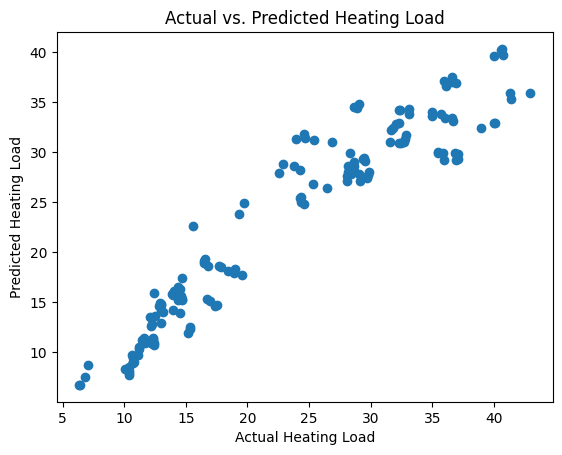

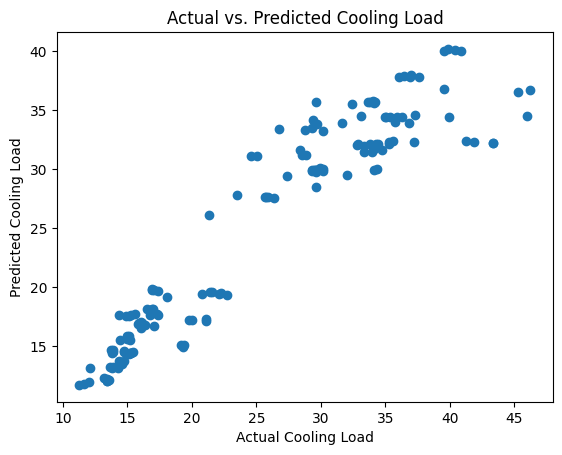

In [11]:
import matplotlib.pyplot as plt

# Visualizing predictions for heating load
plt.scatter(y_test_heating, predictions_heating)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs. Predicted Heating Load")
plt.show()

# Visualizing predictions for cooling load
plt.scatter(y_test_cooling, predictions_cooling)
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title("Actual vs. Predicted Cooling Load")
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for heating load model
cross_val_scores_heating = cross_val_score(model_heating, X, y_heating, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores for Heating Load:")
print(cross_val_scores_heating)

# Perform cross-validation for cooling load model
cross_val_scores_cooling = cross_val_score(model_cooling, X, y_cooling, cv=5, scoring='neg_mean_squared_error')
print("\nCross-Validation Scores for Cooling Load:")
print(cross_val_scores_cooling)


Cross-Validation Scores for Heating Load:
[-16.50580336  -9.45580585  -7.68609962  -8.34258681  -8.97756579]

Cross-Validation Scores for Cooling Load:
[-12.94758537 -11.70035685  -9.71112377 -10.17949975  -9.87138011]


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming you already have trained models: model_heating and model_cooling

# Define a mapping between user-input feature names and actual feature names
feature_mapping = {
    'Feature_1': 'Relative Compactness',
    'Feature_2': 'Surface Area',
    'Feature_3': 'Wall Area',
    'Feature_4': 'Roof Area',
    'Feature_5': 'Overall Height',
    'Feature_6': 'Orientation',
    'Feature_7': 'Glazing Area',
    'Feature_8': 'Glazing Area Distribution11111',
}

# Function to take user input
def get_user_input():
    new_data = {}
    for user_feature, actual_feature in feature_mapping.items():
        feature_value = float(input(f'Enter value for {actual_feature}: '))
        new_data[actual_feature] = [feature_value]
    return pd.DataFrame(new_data)

# Get user input for new data
new_data = get_user_input()

# Making predictions for heating load
prediction_heating = model_heating.predict(new_data)

# Making predictions for cooling load
prediction_cooling = model_cooling.predict(new_data)

# Display the predictions
print("Predicted Heating Load:", prediction_heating[0])
print("Predicted Cooling Load:", prediction_cooling[0])


Enter value for Relative Compactness: 1
Enter value for Surface Area: 1
Enter value for Wall Area: 1
Enter value for Roof Area: 1
Enter value for Overall Height: 1
Enter value for Orientation: 1
Enter value for Glazing Area: 1
Enter value for Glazing Area Distribution: 1
Predicted Heating Load: -473609113302.04175
Predicted Cooling Load: 156429854682.44357
